<h2>Code-Example: Aligned Rank Transform</h2>
<font size="3" face="Verdana">
<br>    
<p style="text-align:justify">The following code implements Aligned Rank Transform on a custom dataset.</p>
<p style="text-align:justify">This dataset is of an experiment that measures system usability score using three sizes of monitors and two different pointing devices.</p>
<p style="text-align:justify">Independent variables here are: monitor_size with 3 levels (Large, Medium, Small) and pointing_device with 2 levels (trackpad, mouse).</p>
<p style="text-align:justify">Dependent variable: score measures the numerical system usability score in the range 1-100.</p>    
<br>    
<p style="text-align:justify">To run the example, click on each of the following code-blocks and press the "run"-button in the menu on top of this page.</p>
<p style="text-align:justify">Follow the comments in each code-block to understand the commands executed in each step.</p>

</font>

In [108]:
# ARTool is an R package to implement the Aligned Rank Transform for conducting ANOVA on factorial models.
library(ARTool)

In [109]:
# We shall import a custom CSV file here that contains data of the experiment given above.
result <- read.csv("Data_for_ART.csv", header=TRUE, sep=";", dec = ",")

In [110]:
# We specify the dependent variable, here "score".
# We specify the independent variables causing main effects, here "monitor_size" and "pointing_device".
# We also specify their interaction, here "monitor_size:pointing_device".

In [111]:
# factor() is used to encode a vector in terms of categories or levels.

In [112]:
# Here, we import row wise participant numbers from the CSV file. 
participant <- result$participant
participant = factor(participant)

In [113]:
# Here, we import row wise monitor sizes from the CSV file.
monitor_size <- result$monitor_size
monitor_size = factor(monitor_size)

In [114]:
# Here, we import row wise pointing devices from the CSV file. 
pointing_device <- result$pointing_device
pointing_device = factor(pointing_device)

In [115]:
# Here, we import row wise scores from the CSV file.
# as.numeric() returns a numerical value of the parameter, here, scores are numerical.
score = result$score
score = as.numeric(score)

In [116]:
# We can now build the data frame for our analysis, using the above data.
data_score = data.frame(participant, monitor_size, pointing_device, score)
data_score

participant monitor_size pointing_device score
1   P01         Large        trackpad         80  
2   P01         Medium       trackpad         90  
3   P01         Small        trackpad         90  
4   P01         Large        mouse           100  
5   P01         Medium       mouse           100  
6   P01         Small        mouse            95  
7   P02         Large        trackpad         75  
8   P02         Medium       trackpad         87  
9   P02         Small        trackpad         95  
10  P02         Large        mouse            97  
11  P02         Medium       mouse           100  
12  P02         Small        mouse            95  
13  P03         Large        trackpad         74  
14  P03         Medium       trackpad         70  
15  P03         Small        trackpad        100  
16  P03         Large        mouse            90  
17  P03         Medium       mouse            67  
18  P03         Small        mouse            90  
19  P04         Large        trackpad         70  
20  P04         Medium       trackpad         80  
21  P04         Small        trackpad         82  
22  P04         Large        mouse            95  
23  P04         Medium       mouse           100  
24  P04         Small        mouse           100  
25  P05         Large        trackpad         70  
26  P05         Medium       trackpad         77  
27  P05         Small        trackpad         87  
28  P05         Large        mouse            92  
29  P05         Medium       mouse            90  
30  P05         Small        mouse            97  
... ...         ...          ...             ...  
91  P16         Large        mouse           100  
92  P16         Small        mouse            97  
93  P16         Medium       trackpad         75  
94  P16         Medium       mouse            90  
95  P16         Large        trackpad         71  
96  P16         Small        trackpad         87  
97  P17         Large        mouse           100  
98  P17         Small        mouse           100  
99  P17         Medium       trackpad         77  
100 P17         Medium       mouse           100  
101 P17         Large        trackpad         72  
102 P17         Small        trackpad         92  
103 P18         Large        mouse           100  
104 P18         Small        mouse            97  
105 P18         Medium       trackpad         68  
106 P18         Medium       mouse            95  
107 P18         Large        trackpad         82  
108 P18         Small        trackpad         77  
109 P19         Large        trackpad         72  
110 P19         Medium       trackpad         75  
111 P19         Small        trackpad         75  
112 P19         Large        mouse            85  
113 P19         Medium       mouse            75  
114 P19         Small        mouse            90  
115 P20         Large        trackpad         75  
116 P20         Medium       trackpad         85  
117 P20         Small        trackpad         92  
118 P20         Large        mouse            95  
119 P20         Medium       mouse           100  
120 P20         Small        mouse            72

In [117]:
# Let us now visualize the data that we have imported.

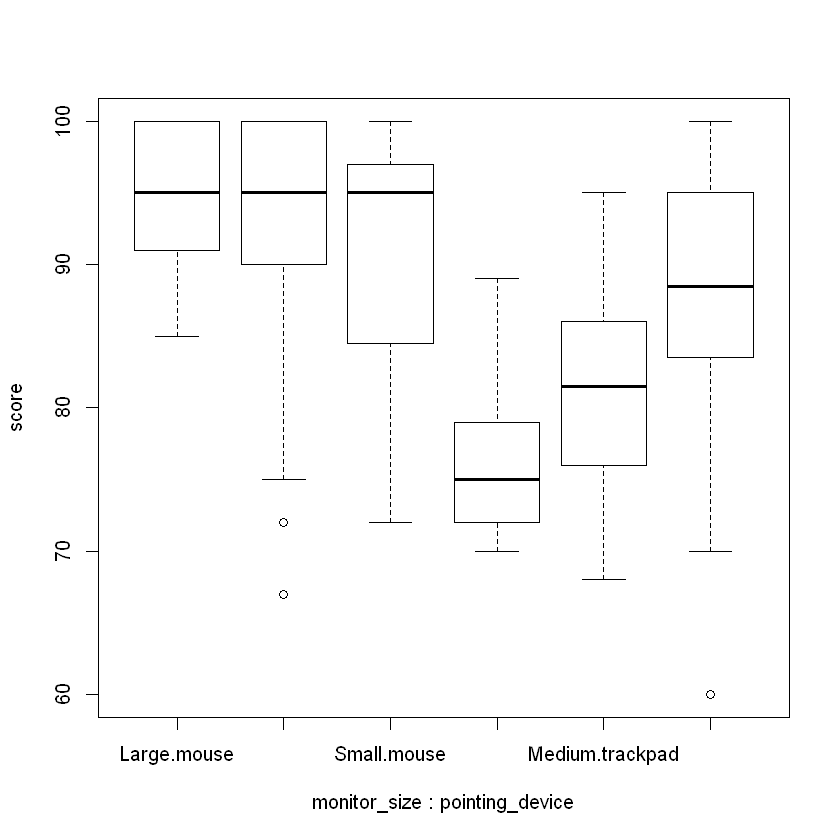

In [118]:
# Looking at the box plot, we can guess that there might be a main effect of using a mouse.
boxplot(score ~ monitor_size * pointing_device, data=data_score)

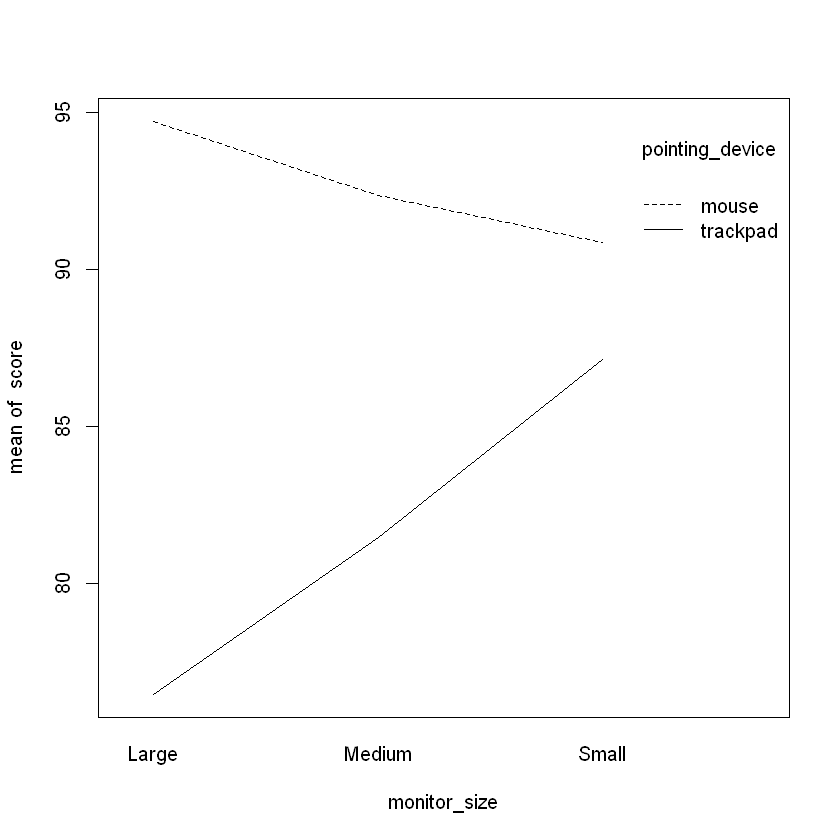

In [100]:
# interaction.plot() illustrates possible interactions between the factors.
# Here, we can see that the scores are better using a mouse.
# We can also see that the scores of using a mouse with a large monitor are high, implying an interaction effect.
with(data_score, interaction.plot(monitor_size, pointing_device, score))

In [101]:
# Now we shall begin with the ART procedure.
# art() allows us to transform the data, it performs the alignment and ranking process.

In [102]:
# To analyze a study using repeated measures ANOVA, an Error() term is used.
model.repeated_measures = art(score ~ monitor_size * pointing_device + Error(factor(participant)), data=data_score)

In [103]:
# We can now apply ANOVA on the  aligned responses.
anova(model.repeated_measures)

Term                         Error  Df Df.res Sum Sq   Sum Sq.res Mean Sq  
1 monitor_size                 Within 2  95      9412.85 81792.98    4706.425
2 pointing_device              Within 1  95     50923.20 58304.78   50923.200
3 monitor_size:pointing_device Within 2  95     22620.87 70186.95   11310.433
  F value   Pr(>F)      
1  5.466366 5.661586e-03
2 82.972678 1.326619e-14
3 15.308988 1.725485e-06

In [104]:
# To analyze a study using mixed effects models, a grouping term is used for the model, here (1|participant).
model.mixed_effects = art(score ~ monitor_size * pointing_device + (1|participant) , data=data_score)
anova(model.mixed_effects)

Term                         F         Df Df.res
monitor_size                 monitor_size                  5.466366 2  95    
pointing_device              pointing_device              82.972678 1  95    
monitor_size:pointing_device monitor_size:pointing_device 15.308988 2  95    
                             Pr(>F)      
monitor_size                 5.661586e-03
pointing_device              1.326619e-14
monitor_size:pointing_device 1.725485e-06

In [105]:
# From both the results above, we can see that there both the main effects are significantly different at 5% level of significance.
# This means the system usability of the three sizes of monitors is significantly different.
# This also means that the system usability of mouse and trackpad is significantly different.

In [106]:
# We can also see that there is an interaction effect between mointor_size and pointing_device as the p-value is <0.05.

In [107]:
# Please note that here we have a simple design of the experiment, so both repeated measures ANOVA and mixed effects give the same response.
# For a more complicated design, it will be advantageous to use mixed effects model.